Link to data source: https://www.kaggle.com/datasets/bobnau/daily-website-visitors

# Daily website visitors

* Number of website **visitors** for **5 years** of **daily**
* An academic teaching notes website whose alias is ***statforecasting.com***
* **Predict** number of website visitors
  * a 1-day-ahead forecasting model
  * a 7-day ahead forecasting model
  * an entire-next-week forecasting model

### Load the data

In [317]:
import pandas as pd

data_path = 'daily-website-visitors.csv'
data = pd.read_csv(data_path)

In [318]:
data

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499


##### Content
* **2167** rows of data
* From September 14, 2014, to August 19, 2020

##### Variables
* **Page.Loads**: daily counts of page loads
* **Unique.Visits**: daily counts of unique visitors - the sum of the counts of returning and first-time visitors
* **First.Time.Visits**: daily counts of first-time visitors
* **Returning.Visits**: daily counts of returning visitors

### Data preprocessing

In [319]:
# Convert Date into Datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Remove commas
data.replace(',', '', regex=True, inplace=True)

# Convert into int type
data['Page.Loads'] = data['Page.Loads'].astype(int)
data['Unique.Visits'] = data['Unique.Visits'].astype(int)
data['First.Time.Visits'] = data['First.Time.Visits'].astype(int)
data['Returning.Visits'] = data['Returning.Visits'].astype(int)

In [320]:
data.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,2014-09-14,2146,1582,1430,152
1,2,Monday,2,2014-09-15,3621,2528,2297,231
2,3,Tuesday,3,2014-09-16,3698,2630,2352,278
3,4,Wednesday,4,2014-09-17,3667,2614,2327,287
4,5,Thursday,5,2014-09-18,3316,2366,2130,236


### Bootstrapping function
Frequency distribution of **unique visitors** column
* Parameters:
  * n: bootstrap sample size
  * M: number of bootstrap samplings
  * x: confidence interval in %
* Returns:
  * sampling distribution
  * confidence interval

In [334]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def bootstrapping(n, M, x):
    mean_bootstrapped = []

    # Make a bootstraped dataset of size M
    for _ in range(M):
        # Randomly select n rows from the original dataset
        samples_random = data.sample(n)
        # Calculate the mean of the bootstrapped dataset
        mean_samples = samples_random['Unique.Visits'].mean()
        # Append the mean to the list
        mean_bootstrapped.append(mean_samples)

    # Compute the confidence interval of the mean
    alpha = 1-x
    mean_bootstrapped.sort()
    lower_bound = mean_bootstrapped[int(alpha * M)]
    upper_bound = mean_bootstrapped[int((1 - alpha) * M)]

    # Plot the bootstrapped mean
    plt.figure(figsize=(10, 6))
    fig = sns.histplot(mean_bootstrapped, kde=True, bins=20, color='red')
    plt.axvline(lower_bound, color='purple')
    plt.axvline(upper_bound, color='purple')
    plt.title('Unique Visits Mean Bootstrapped')
    fig.set_xlabel('Mean')
    fig.set_ylabel('Frequency')
    plt.show()


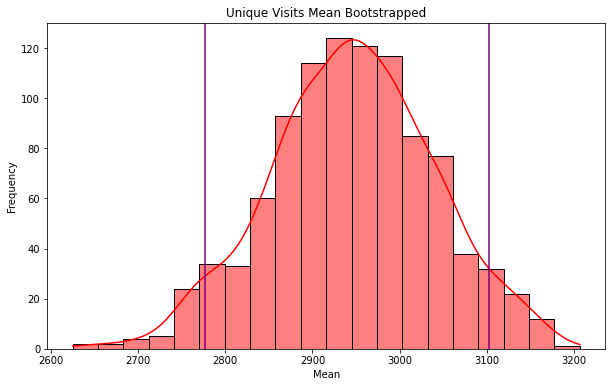

In [335]:
bootstrapping(100, 1000, 0.95)